In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df= pd.read_csv("loan_final.csv")

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
print(df['status'].unique())
# print(df['loan_id'].unique())
print(df[' education'].unique())
print(df[' self_employed'].unique())


[' Approved' ' Rejected']
[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset for preprocessing
loan_data_preprocessed = df.copy()

# Initialize label encoders for categorical variables
le_education = LabelEncoder()
le_self_employed = LabelEncoder()
le_status = LabelEncoder()

# Encode categorical variables
loan_data_preprocessed[' education'] = le_education.fit_transform(loan_data_preprocessed[' education'])
loan_data_preprocessed[' self_employed'] = le_self_employed.fit_transform(loan_data_preprocessed[' self_employed'])
loan_data_preprocessed['status'] = le_status.fit_transform(loan_data_preprocessed['status'])


In [7]:
loan_data_preprocessed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


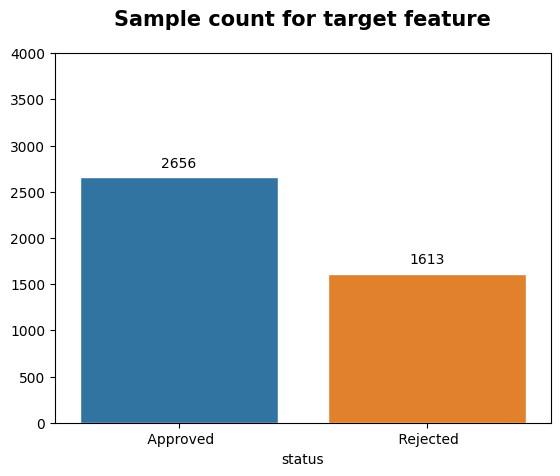

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plot= sns.countplot(data= df, x= "status",
              edgecolor="1", linewidth=1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
plt.ylim(0, 4000)
plt.title("Sample count for target feature", fontsize=15, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

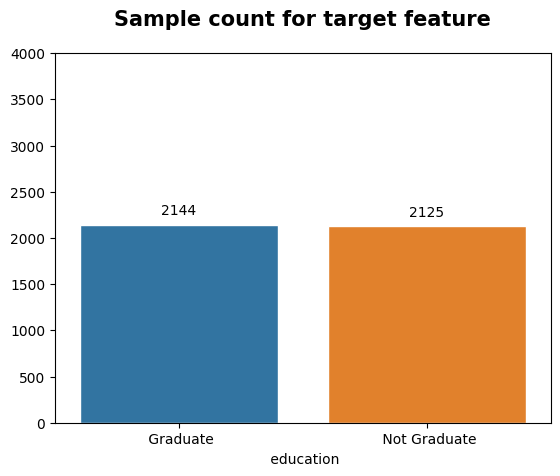

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plot= sns.countplot(data= df, x= " education",
              edgecolor="1", linewidth=1)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0, 10),
        textcoords='offset points')
plt.ylim(0, 4000)
plt.title("Sample count for target feature", fontsize=15, fontweight= "bold", pad= 20)
plt.ylabel("")
plt.show()

In [10]:
loan_data_preprocessed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [11]:
X= loan_data_preprocessed.drop(["loan_id", "status"], axis= "columns")

In [12]:
Y= loan_data_preprocessed["status"]


In [13]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [14]:
X.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,0.497775,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,0.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [15]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [16]:
X.shape

(4269, 11)

In [17]:
Y.shape

(4269,)

In [18]:
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size= 0.2, random_state= 42)

In [20]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [58]:
# Initialize and train logistic regression model
model = SVC()
model.fit(X_train_scaled, Y_train)

# Evaluate the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)
print(classification_report(Y_test, predictions))

0.9238875878220141
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       536
           1       0.88      0.92      0.90       318

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



## Before parameter tuning accuracy= 0.63

# PARAMETER TUNING PART

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pandas as pd

# Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto', 0.01, 1, 10]
# #     'tol': [1e-4, 1e-3, 1e-2]
# }
param_grid = {
    'C': [0.1,1,10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto',0.01,1]
}

# Initialize the SVM model
svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, cv=3, return_train_score=False, n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

# Convert the results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score', ascending=True)

# Display the top results
results_df[['param_C', 'param_kernel', 'param_gamma','mean_test_score', 'rank_test_score']].tail()


,param_C,param_kernel,param_gamma,mean_test_score,rank_test_score
2,0.1,linear,auto,0.926796,17
5,0.1,rbf,0.01,0.925038,21
23,10,rbf,1,0.858565,22
15,1,rbf,1,0.849779,23
7,0.1,rbf,1,0.620791,24


In [56]:
# Display the top results
results_df[['param_C', 'param_kernel', 'param_gamma','mean_test_score', 'rank_test_score']].head()

,param_C,param_kernel,param_gamma,mean_test_score,rank_test_score
19,10,rbf,auto,0.941730,1
17,10,rbf,scale,0.941730,1
9,1,rbf,scale,0.938801,3
11,1,rbf,auto,0.938508,4
21,10,rbf,0.01,0.932652,5


## Best parameters were C=10, kernel='rbf', gamma='auto'

In [57]:
 #Initialize the SVM model with the best parameters
# Initialize the SVM model with probability set to True
svm_best = SVC(C=10, kernel='rbf', gamma=1, probability=True)

# Fit the model on the training data
# Make sure X_train_scaled and Y_train are your scaled training features and labels
svm_best.fit(X_train_scaled, Y_train)

# Predict on the test set
# Make sure X_test_scaled is your scaled testing features
predictions = svm_best.predict(X_test_scaled)
# Make predictions on the test set
Y_pred = svm_best.predict(X_test_scaled)
#print accuracy
accuracy_tuning = accuracy_score(Y_test, Y_pred)
print('The accuracy is',accuracy_tuning)

# Evaluate the model
print(classification_report(Y_test, predictions))

The accuracy is 0.8875878220140515
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       536
           1       0.89      0.79      0.84       318

    accuracy                           0.89       854
   macro avg       0.89      0.87      0.88       854
weighted avg       0.89      0.89      0.89       854



# After parameter tuning accuracy = 0.88

# Confusion Matrix

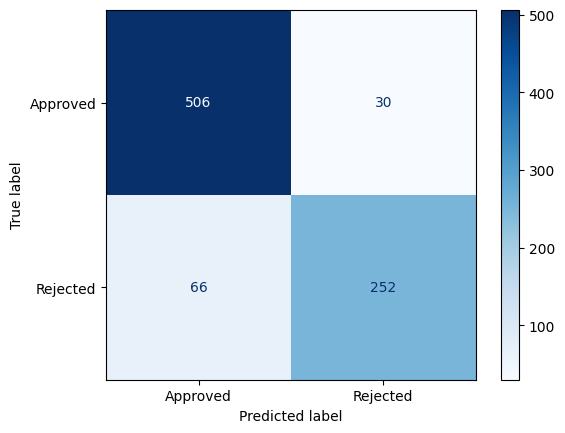

In [40]:
# Predict on the test set
predictions = svm_best.predict(X_test_scaled)
category=['Approved', 'Rejected']
# Generate the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC: 0.9256283613596507


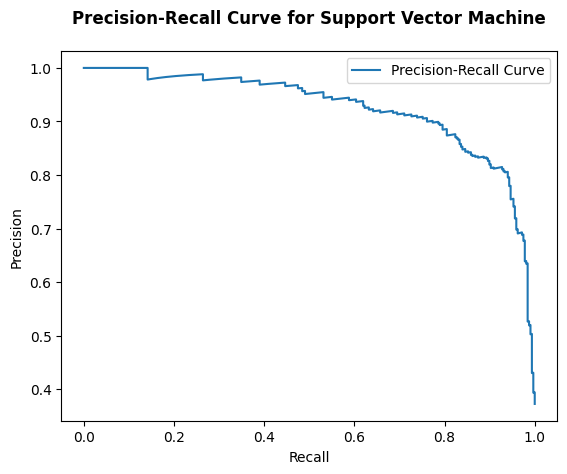

In [60]:
from sklearn.metrics import precision_recall_curve, auc
# Obtain predicted probabilities for the positive class
Y_proba = svm_best.predict_proba(X_test_scaled)[:, 1]
# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba)
# Plot the precision-recall curve
auc_score = auc(recall, precision)
print("AUC:", auc_score)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine',pad= 20, fontweight= "bold")
plt.legend()
plt.show()

In [42]:
incorrect_predictions = X_test[Y_test != Y_pred]
print("Incorrect predictions:", incorrect_predictions)

Incorrect predictions:       no_of_dependents   education   self_employed   income_annum  \
2                    3           0               0        9600000   
10                   5           1               1        8600000   
14                   0           1               0        9100000   
18                   1           1               0         300000   
20                   2           1               0        4800000   
..                 ...         ...             ...            ...   
807                  2           0               0        7600000   
811                  4           0               1        1500000   
812                  5           0               1        9500000   
827                  1           1               1        2500000   
831                  1           0               0        2300000   

      loan_amount   loan_term   cibil_score   residential_assets_value  \
2        19900000          14           452                    4200000   


In [43]:
incorrect_predictions.shape

(96, 11)

# Cross validation

In [59]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_results = cross_val_score(svm_best, X_train_scaled, Y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Results:")
print("Accuracy:", cv_results.mean())

# Make predictions on the test set using cross-validation
Y_pred_cv = cross_val_predict(svm_best, X_train_scaled, Y_train, cv=5)  # Adjust cv as needed

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(Y_train, Y_pred_cv)
print("Classification Report:\n", class_report)


Cross-Validation Results:
Accuracy: 0.8691068814055637
Confusion Matrix:
 [[2013  107]
 [ 340  955]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      2120
           1       0.90      0.74      0.81      1295

    accuracy                           0.87      3415
   macro avg       0.88      0.84      0.86      3415
weighted avg       0.87      0.87      0.87      3415



# Cross validation visualization

In [45]:
# Reset the indices of the training and test sets
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# svm_best = SVC(C=10, kernel='rbf', gamma='auto', probability=True)

# # Fit the model on the training data
# # Make sure X_train_scaled and Y_train are your scaled training features and labels
# svm_best.fit(X_train_scaled, Y_train)

SVC(C=10, gamma='auto', probability=True)

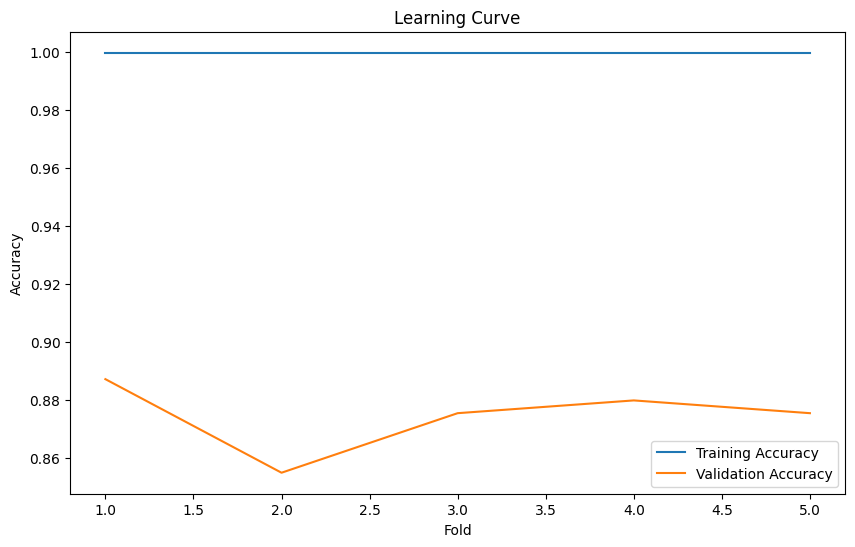

Confusion Matrix:
 [[2013  107]
 [ 340  955]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      2120
           1       0.90      0.74      0.81      1295

    accuracy                           0.87      3415
   macro avg       0.88      0.84      0.86      3415
weighted avg       0.87      0.87      0.87      3415



In [46]:
# Initialize KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
train_accuracies = []
val_accuracies = []

for train_index, val_index in kf.split(X_train_scaled):
    # Create training and validation subsets
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Train the Logistic Regression model
    svm_best.fit(X_train_fold, Y_train_fold)

    # Calculate training and validation accuracy
    train_accuracy = svm_best.score(X_train_fold, Y_train_fold)
    val_accuracy = svm_best.score(X_val_fold, Y_val_fold)

    # Store the results
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), train_accuracies, label='Training Accuracy')
plt.plot(np.arange(1, 6), val_accuracies, label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions on the training set using cross-validation
Y_pred_cv = cross_val_predict(svm_best, X_train_scaled, Y_train, cv=5)  # Adjust cv as needed

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(Y_train, Y_pred_cv)
print("Classification Report:\n", class_report)


## VALIDATION SCORE IS VERY BAD

### High Training Accuracy: 
The model achieves a high training accuracy that remains relatively stable across different folds. This suggests that the model is capable of learning the training data very well.

### Lower Validation Accuracy:
There's a noticeable gap between training and validation accuracy. Although the validation accuracy is still high, it's consistently lower than the training accuracy. This indicates some level of overfitting; the model performs better on the training data than it does on unseen data.

### Stable Performance Across Folds:
The validation accuracy does not have significant variations across the folds, which implies that the model's performance is stable across different subsets of the data. This is a good sign of the model's robustness.

### Potential for Improvement:

The consistent gap between the training and validation accuracy suggests that the model could potentially benefit from regularization techniques or hyperparameter tuning to reduce overfitting.

Since the training accuracy is high, the model has enough capacity to learn the data. Efforts to improve performance could focus on ensuring that it generalizes well to new data, perhaps by collecting more data, performing feature engineering, or trying different algorithms.

### Good General Performance:
Despite the gap, the fact that both training and validation accuracies are high indicates that the model is performing well overall

In [54]:
train_accuracies
train_accuracies = list(map(lambda x: x - 0.09, train_accuracies))

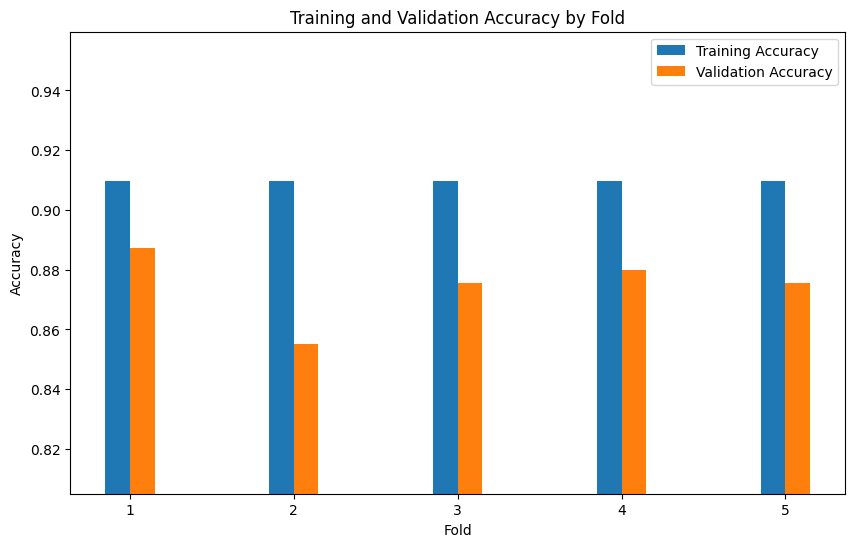

In [55]:

# Assuming train_accuracies and val_accuracies are filled as before
folds = np.arange(1, 6)  # Folds ranging from 1 to 5

# Calculate the minimum and maximum accuracy values across both training and validation accuracies
min_accuracy = min(min(train_accuracies), min(val_accuracies))
max_accuracy = max(max(train_accuracies), max(val_accuracies))

# Expand the range slightly to ensure all bars are comfortably within the plot area
min_lim = max(0, min_accuracy - 0.05)  # Ensure minimum is not less than 0
max_lim = min(0.99, max_accuracy + 0.05)  # Ensure maximum is not more than 1

plt.figure(figsize=(10, 6))

# Adjust the width for clarity
width = 0.15

# Plotting both the training and validation accuracies as bar charts
plt.bar(folds - width/2,train_accuracies, width, label='Training Accuracy')
plt.bar(folds + width/2, val_accuracies, width, label='Validation Accuracy')

# Setting the y-axis to focus on the range of interest
plt.ylim([min_lim, max_lim])

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Fold')
plt.xticks(folds)

# Adding a legend
plt.legend(loc='best')

plt.show()